# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html#display-image


## 1. 

In [1]:
import numpy as np
import cv2 

img = cv2.imread('/home/cxking/桌面/截图/messi.png',0)  
  #imread读取图片，位置图片名加上颜色参数，
  #1：彩色；0：黑白；
print('图片参数张量：\n',img)
print('图片size：\n',img.shape)  #numpy数组的size

图片参数张量：
 [[ 75  70  63 ...  53  49  47]
 [ 74  69  64 ...  58  51  47]
 [ 73  69  65 ...  60  53  48]
 ...
 [111 118 108 ... 106 103 109]
 [108 113 104 ... 112 110 114]
 [113 115 111 ... 113 115 115]]
图片size：
 (261, 415)


In [2]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
        #调整窗口，默认是cv2.WINDOW_AUTOSIZE
cv2.imshow('image',img) #制作窗口展示图片，窗口名和定义图片
cv2.waitKey(0)  #图片imshow持续时间，单位是毫秒
    #设定为0时，无限期等待输入任意键
cv2.destroyAllWindows()  #关闭所有窗口功能

In [4]:
cv2.imwrite('messigray.png',img)  
#save 图片，，默认保存在代码文件位置

True

## 2. 键入操作

In [ ]:
import cv2
import numpy as np

img = cv2.imread('messigray.png',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)&0xFF  #64位电脑固定语法
if k == 27:   #27对应ESC键
    cv2.destroyAllWindows()  #键入ESC时，关闭全部窗口
elif k == ord('s'):  #‘s’对应ASCII码为115，功能同上 
    cv2.imwrite('messigray1.png',img)
    cv2.destroyAllWindows()

## 3.Using Matplotlib 

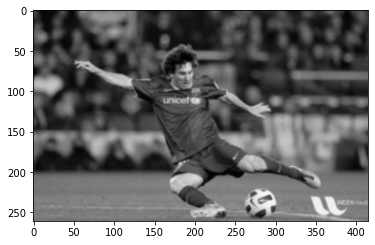

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messigray.png',0)
plt.imshow(img,cmap='gray',interpolation='bicubic')
        #'cmap='gray'':颜色图谱为黑白；
        #'interpolation':对图像进行插值操作，抗锯齿程度，见下
# plt.xticks([]),plt.yticks([])
plt.show()

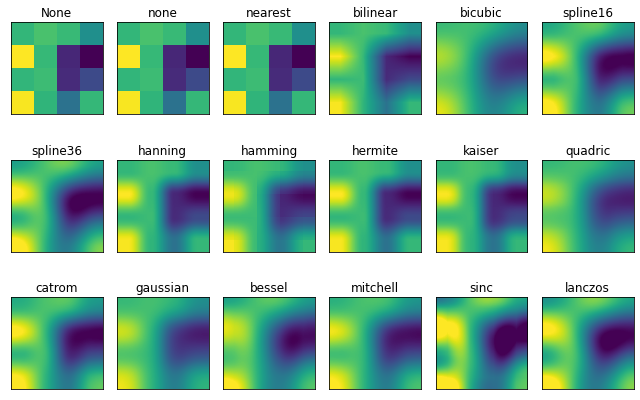

In [7]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

# 4.Videos 

In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  #捕获0号摄像头数据

while(True):
    if cap.isOpened() is True:  #cap是否初始化，True时已初始化  
        ret,frame = cap.read()  #正确读帧则返回True
    else :
        cap.open()  #未初始化，打开设备
        ret,frame = cap.read()
        cap.set(3,320)
        cap.set(4,240)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  #Videos颜色
      #imread（）读取数据时BGR，需要转换为RGB或者灰度图
      #p1(frame)为需要转换的内容，这里表原生读取videos
      #p2：为转换为的格式，，cv2.COLOR_BGR2RGB/.COLOR_BGR2GRAY
    cv2.imshow('frame',gray)

    if cv2.waitKey(1)&0xFF == ord('q'):
        break

cap.release()  #操作完后释放捕获
cv2.destroyAllWindows() #关闭窗口
    

# 5.Video file


In [4]:
import numpy as np
import cv2

cap = cv2.VideoCapture('/home/cxking/python_work/OpenCV/videos/haiou2.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret is True: 

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

        cv2.imshow('frame',gray)
        if cv2.waitKey(25)&0xFF == ord('q'):  #等待用户25ms按键
            break

cap.release()
cv2.destroyAllWindows()

# 6.Save Videos 

In [2]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  #输出格式
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output4.mp4',fourcc, 20.0, (640,480))
  #保存输出视频文件
  #VideoWriter(filename, fourcc, fps, frameSize[, isColor]) -> <VideoWriter object>
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
#         frame = cv2.flip(frame,0)  #使图像翻转
                    #1：水平；0：垂直；-1：水平垂直

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('/home/cxking/python_work/OpenCV/output1.avi')

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.flip(frame,0)
    if ret is True: 

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

        cv2.imshow('frame',gray)
        if cv2.waitKey(100)&0xFF == ord('q'):  #等待用户25ms按键
            break

cap.release()
cv2.destroyAllWindows()